In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

1 :


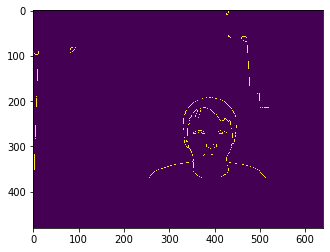

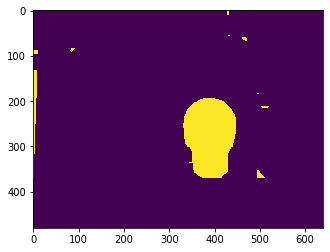

2 :


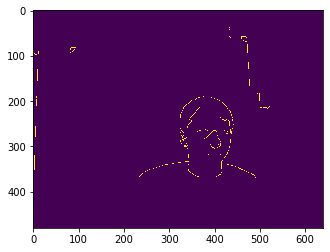

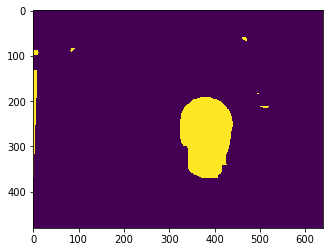

3 :


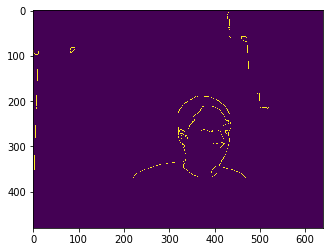

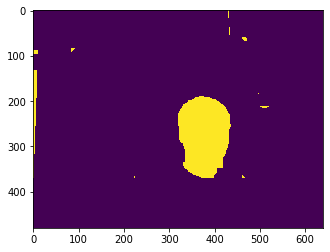

4 :


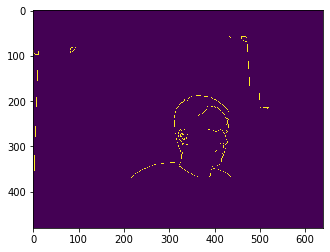

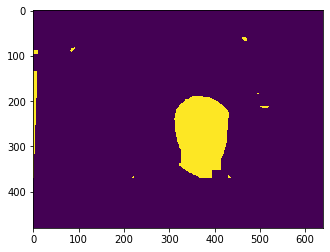

5 :


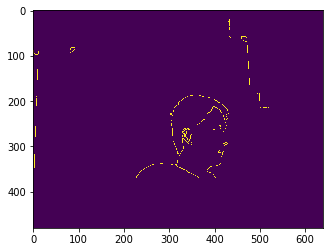

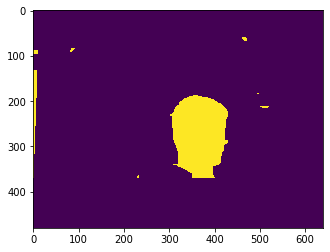

6 :


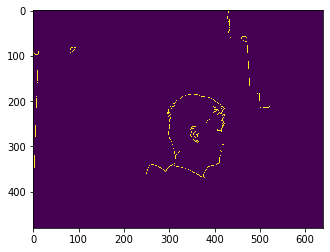

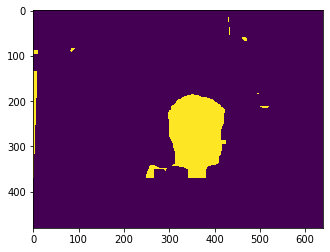

7 :


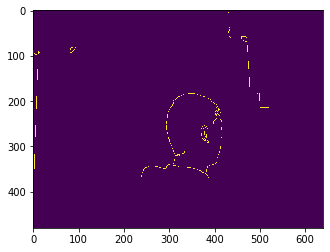

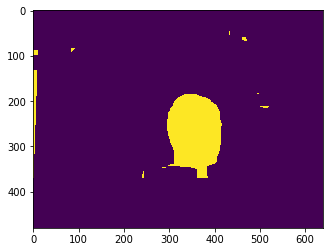

8 :


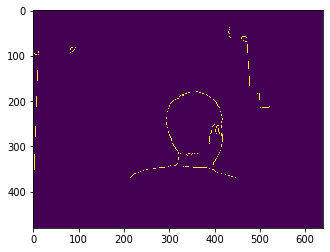

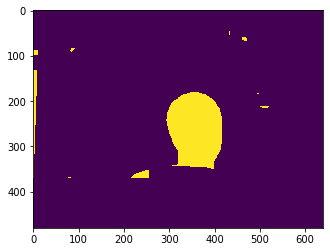

9 :


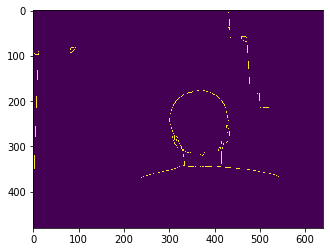

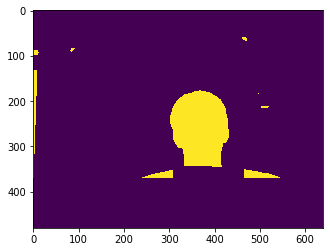

10 :


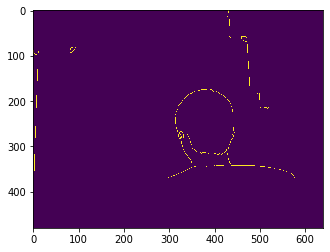

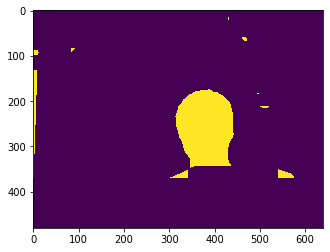

11 :


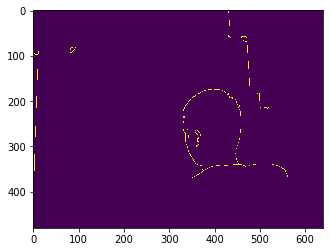

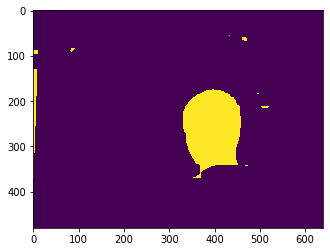

12 :


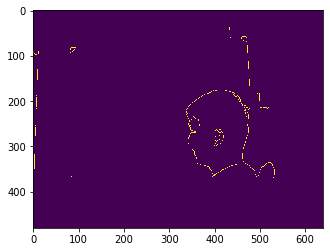

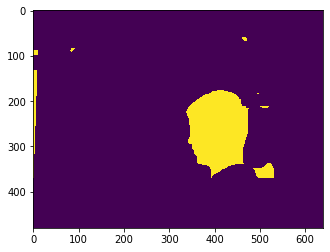

13 :


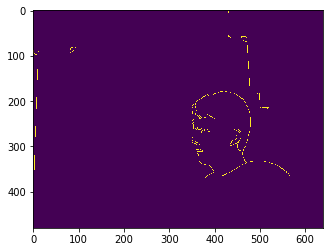

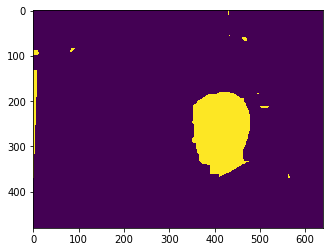

14 :


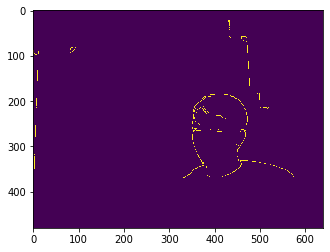

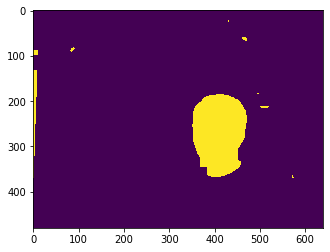

In [3]:
for i in range(1,15):
    print(i,":")
# construct the argument parse and parse the arguments
#     ap = argparse.ArgumentParser()
#     ap.add_argument("-i", "--images", required=True,help="path to input dataset of images")
#     args = vars(ap.parse_args())
    # loop over the images

    # load the image, convert it to grayscale, and blur it slightly
    image = cv2.imread('./head_2d_image/full_1_{}.png'.format(i))
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     blurred = cv2.GaussianBlur(image, (3,3), 0)
    # apply Canny edge detection using a wide threshold, tight
    # threshold, and automatically determined threshold
#     blurred[:100,:]=0

    image[370:,:]=0

    tight = cv2.Canny(image, 100, 250)

#     blurred[101]=0
#     plt.imshow(wide);plt.show()
    plt.imshow(tight);plt.show()
#     plt.imshow(auto);plt.show()
    kernel = np.ones((3,3))
    dilation = cv2.dilate(tight,kernel,iterations =9)
#     dilation[479,:] = 255
    im_floodfill = binary_fill_holes(dilation)
    im_floodfill = im_floodfill*1
    im_floodfill = np.uint8(im_floodfill)

    
    erode = cv2.erode(im_floodfill,kernel,iterations=10)
    plt.imshow(erode);plt.show()

image 1


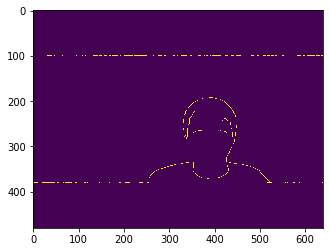

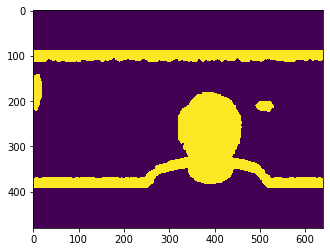

image 2


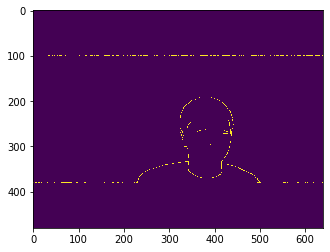

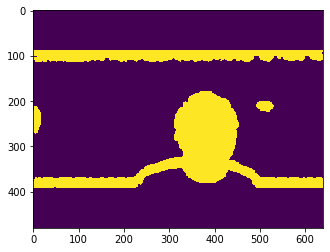

image 3


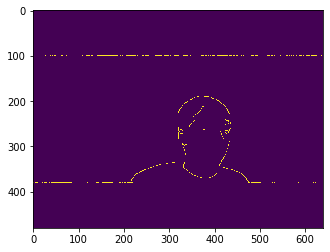

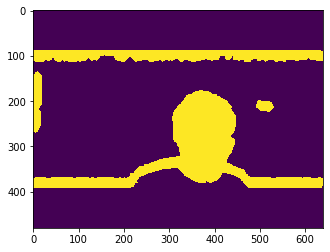

image 4


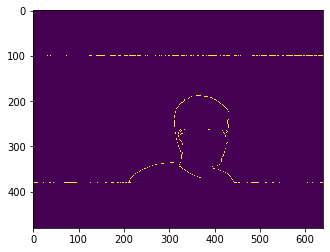

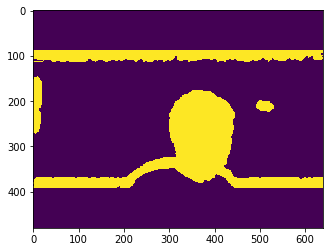

image 5


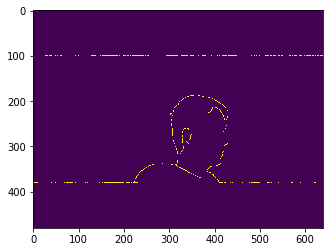

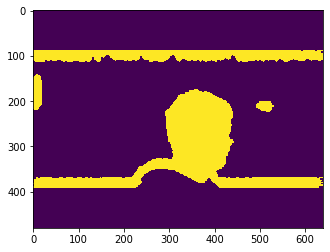

image 6


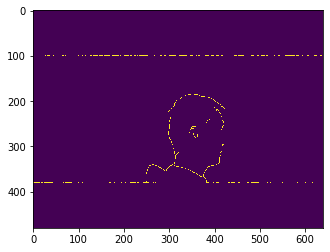

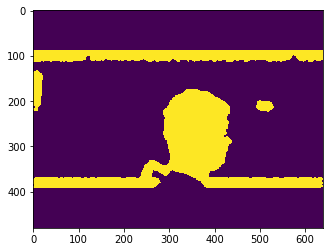

image 7


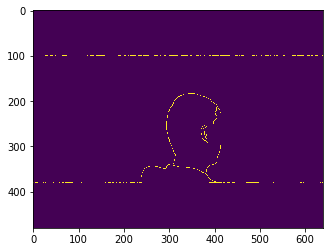

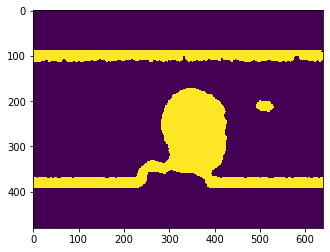

image 8


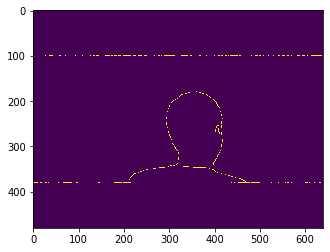

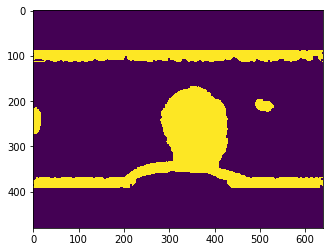

image 9


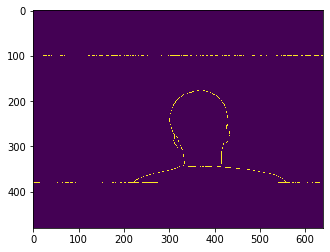

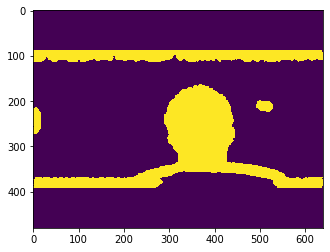

image 10


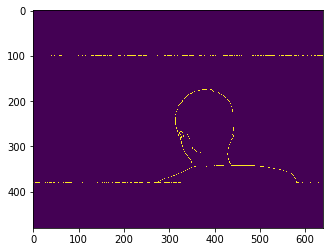

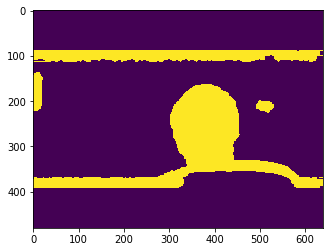

image 11


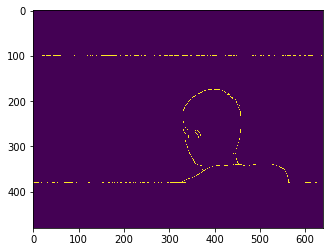

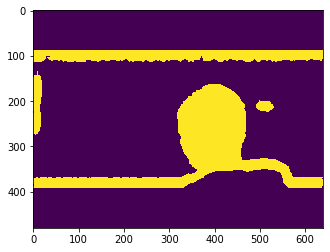

image 12


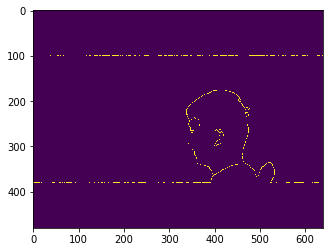

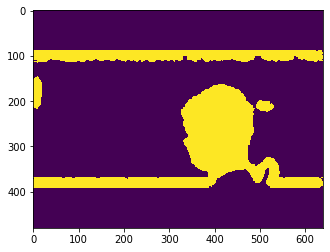

image 13


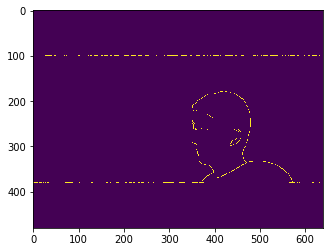

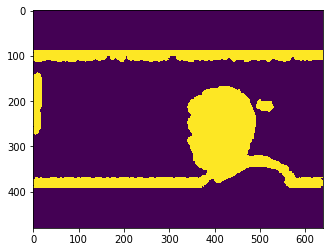

image 14


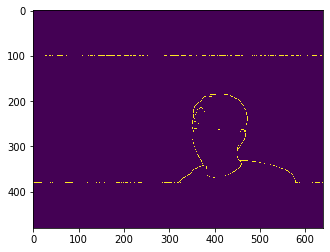

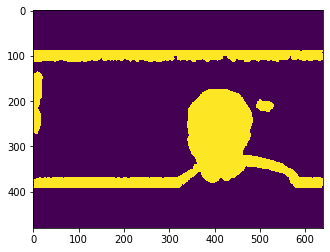

In [6]:
for i in range(1,15):
    print("image {}".format(i))
    image = cv2.imread('./head_2d_image/full_1_{}.png'.format(i))
    blurred = cv2.GaussianBlur(image, (3,3), 0)
    image[:100,:]=0
    image[100]=0
    image[380:,:]=0
    image[380,:]=1
    blurred[:100,:]=0
    blurred[100]=0
    blurred[380:,:]=0
    blurred[380,:]=1
#     imgray = cv2.cvtColor(rgb_hand,cv2.COLOR_BGR2GRAY)
#     ret,thresh = cv2.threshold(imgray,127,255,0)

#     hsv_hand = cv2.cvtColor(rgb_hand, cv2.COLOR_BGR2HSV)
#     s = hsv_hand[:,:,1]
    # cv2.imshow("original",rgb_hand)
    # extract the edge and dilate
    edge = cv2.Canny(blurred,130,250)
    plt.imshow(edge);plt.show()
    plt.imsave("edge.png",edge)
    
    for i in range (12):
        _, contours, hierarchy = cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        image_another = image.copy()
        cv2.drawContours(image_another, contours, -1, (255,0,0), 0)
        edge = cv2.Canny(image_another,200,250)
    
    kernel = np.ones((3,3))
    dilation = cv2.dilate(edge,kernel,iterations =1)
    dilation[479,:] = 255
    im_floodfill = binary_fill_holes(dilation)
    im_floodfill = im_floodfill*1
    im_floodfill = np.uint8(im_floodfill)

    
    erode = cv2.erode(im_floodfill,kernel,iterations=1)
    plt.imshow(erode);plt.show()

    # Display the image.
    
    
#     kernel = np.ones((3,3))
#     # cv2.imshow("edge",edge)
#     dilation = cv2.dilate(edge,kernel,iterations =30)
#     erode = cv2.erode(dilation,kernel,iterations=30)
#     # cv2.imshow("dilation",dilation)
#     # 
#     # cv2.imshow("closing",closing)
#     plt.imshow(erode);plt.show()
#     # flood fill
#     # im_floodfill = closing.copy()
#     erode[479,:] = 255
#     im_floodfill = binary_fill_holes(erode)
#     im_floodfill = im_floodfill*1
#     im_floodfill = np.uint8(im_floodfill)
#     plt.imshow(im_floodfill);plt.show()
#     kernel = np.ones((4,4))
#     dilation = cv2.dilate(im_floodfill,kernel,iterations = 1)
#     erode = cv2.erode(dilation,kernel,iterations=1)
#     # plt.imshow(dilation);plt.show()
#     opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, np.ones((4,4)))
#     plt.imshow(opening);plt.show()

In [3]:
# gen 2d images
for i in range(1,15):
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    head.reset_filters()
    # self.reset_filters()
    head.edge_based_filter()
    head.filter_nan()
    head.filter_depth(1.5)
    head.sparsify(1)
#     head.remove_dangling()
    print("dangling removal done")
#     head.remove_background_color()
    print("color filter done.")
    head.center()
    head.get_filtered_image()
    head.create_vpython_spheres()
    head.save()

(307200,)
(17824,)
dangling removal done
color filter done.
(307200,)
(17875,)
dangling removal done
color filter done.


KeyboardInterrupt: 

In [4]:
# gen pickled heads
for i in range(1,15):
    print(i)
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    head.full_filter()

1
(307200,)
(17905,)
depth filter done.
dangling removal done
color filter done.
2
(307200,)
(17887,)
depth filter done.
dangling removal done
color filter done.
3
(307200,)
(18084,)
depth filter done.
dangling removal done
color filter done.
4
(307200,)
(18733,)
depth filter done.
dangling removal done
color filter done.
5
(307200,)
(19439,)
depth filter done.
dangling removal done
color filter done.
6
(307200,)
(19957,)
depth filter done.
dangling removal done
color filter done.
7
(307200,)
(18716,)
depth filter done.
dangling removal done
color filter done.
8
(307200,)
(18646,)
depth filter done.
dangling removal done
color filter done.
9
(307200,)
(20394,)
depth filter done.
dangling removal done
color filter done.
10
(307200,)
(19878,)
depth filter done.
dangling removal done
color filter done.
11
(307200,)
(19824,)
depth filter done.
dangling removal done
color filter done.
12
(307200,)
(21812,)
depth filter done.
dangling removal done
color filter done.
13
(307200,)
(20293,)
dep

In [5]:
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [6]:
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
    heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        print("join {}, {}".format(i-1-first,i-first))
        heads.join_heads_wraper(i-1-first,i-first)
        heads.icp_transform(i-1-first,i-first)
    heads.save(sparcity=1) 
    print ("completed")
    return heads

ids are not unique
Searching (head 0 and 1), 0/84 done, distance: 0.006659329180422118
ids are not unique
Searching (head 0 and 1), 1/84 done, distance: 0.007432819873511451
ids are not unique
Searching (head 0 and 1), 2/84 done, distance: 0.007084190939908224
ids are not unique
Searching (head 0 and 1), 3/84 done, distance: 0.007065010567377993
ids are not unique
Searching (head 0 and 1), 4/84 done, distance: 0.006680789428035086
ids are not unique
Searching (head 0 and 1), 5/84 done, distance: 0.007099656090077553
ids are not unique
Searching (head 0 and 1), 6/84 done, distance: 0.006913571151935117
ids are not unique
Searching (head 0 and 1), 7/84 done, distance: 0.008095892466893727
ids are not unique
Searching (head 0 and 1), 8/84 done, distance: 0.007830624928154391
ids are not unique
Searching (head 0 and 1), 9/84 done, distance: 0.008065257892632337
ids are not unique
Searching (head 0 and 1), 10/84 done, distance: 0.006344062931411252
ids are not unique
Searching (head 0 and 1

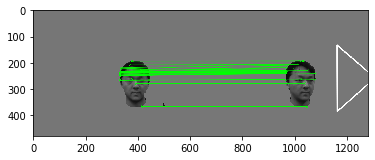

ids are not unique
start icp
step:  0 before:  0.007169346338679153
found the best fit transform 0
2
join 1, 2
ids are not unique
Searching (head 1 and 2), 0/84 done, distance: 0.00558348821278916
ids are not unique
Searching (head 1 and 2), 1/84 done, distance: 0.005490325987219681
ids are not unique
Searching (head 1 and 2), 2/84 done, distance: 0.0056196472434499566
ids are not unique
Searching (head 1 and 2), 3/84 done, distance: 0.005953788551773634
ids are not unique
Searching (head 1 and 2), 4/84 done, distance: 0.005663202383221836
ids are not unique
Searching (head 1 and 2), 5/84 done, distance: 0.0060636127160446
ids are not unique
Searching (head 1 and 2), 6/84 done, distance: 0.007194739879924592
ids are not unique
Searching (head 1 and 2), 7/84 done, distance: 0.00672802697016346
ids are not unique
Searching (head 1 and 2), 8/84 done, distance: 0.005588581008151098
ids are not unique
Searching (head 1 and 2), 9/84 done, distance: 0.005759631466730054
ids are not unique
Sea

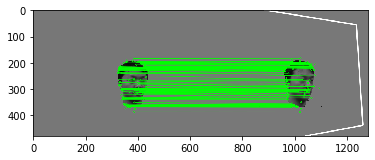

ids are not unique
start icp
step:  0 before:  0.006402763137862388
found the best fit transform 0
3
join 2, 3
ids are not unique
Searching (head 2 and 3), 0/84 done, distance: 0.006868558403021221
ids are not unique
Searching (head 2 and 3), 1/84 done, distance: 0.006137037814772054
ids are not unique
Searching (head 2 and 3), 2/84 done, distance: 0.0069966271019490465
ids are not unique
Searching (head 2 and 3), 3/84 done, distance: 0.006548383331463904
ids are not unique
Searching (head 2 and 3), 4/84 done, distance: 0.006198763959519267
ids are not unique
Searching (head 2 and 3), 5/84 done, distance: 0.007076666785805613
ids are not unique
Searching (head 2 and 3), 6/84 done, distance: 0.005547068314248783
ids are not unique
Searching (head 2 and 3), 7/84 done, distance: 0.006164623252329547
ids are not unique
Searching (head 2 and 3), 8/84 done, distance: 0.006211392432639693
ids are not unique
Searching (head 2 and 3), 9/84 done, distance: 0.006065360371935041
ids are not unique

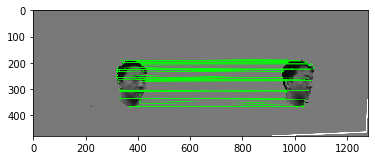

ids are not unique
start icp
step:  0 before:  0.00660896834417558
found the best fit transform 0
4
join 3, 4
ids are not unique
Searching (head 3 and 4), 0/84 done, distance: 0.005724784392992132
ids are not unique
Searching (head 3 and 4), 1/84 done, distance: 0.005114297860047533
ids are not unique
Searching (head 3 and 4), 2/84 done, distance: 0.0052976677907334855
ids are not unique
Searching (head 3 and 4), 3/84 done, distance: 0.005526493618428423
ids are not unique
Searching (head 3 and 4), 4/84 done, distance: 0.005117130644331736
ids are not unique
Searching (head 3 and 4), 5/84 done, distance: 0.005890573066261596
ids are not unique
Searching (head 3 and 4), 6/84 done, distance: 0.0051405036072791985
ids are not unique
Searching (head 3 and 4), 7/84 done, distance: 0.004923059996256102
ids are not unique
Searching (head 3 and 4), 8/84 done, distance: 0.005688865261739016
ids are not unique
Searching (head 3 and 4), 9/84 done, distance: 0.005445808251363561
ids are not unique

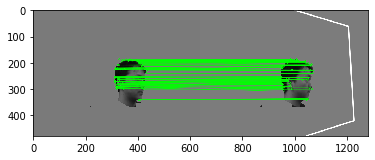

ids are not unique
start icp
step:  0 before:  0.006047227746951168
found the best fit transform 0
5
join 4, 5
ids are not unique
Searching (head 4 and 5), 0/84 done, distance: 0.010802066305212257
ids are not unique
Searching (head 4 and 5), 1/84 done, distance: 0.008234603442231208
ids are not unique
Searching (head 4 and 5), 2/84 done, distance: 0.009772104668045248
ids are not unique
Searching (head 4 and 5), 3/84 done, distance: 0.008874839371775434
ids are not unique
Searching (head 4 and 5), 4/84 done, distance: 0.00908477870464666
ids are not unique
Searching (head 4 and 5), 5/84 done, distance: 0.008568876929569615
ids are not unique
Searching (head 4 and 5), 6/84 done, distance: 0.007999007255272084
ids are not unique
Searching (head 4 and 5), 7/84 done, distance: 0.008058589242310532
ids are not unique
Searching (head 4 and 5), 8/84 done, distance: 0.008844102080629607
ids are not unique
Searching (head 4 and 5), 9/84 done, distance: 0.00874170424750455
ids are not unique
Se

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Searching (head 4 and 5), 73/84 done, distance: 0.011638524569294977
ids are not unique
Searching (head 4 and 5), 74/84 done, distance: 0.04572775127572929
ids are not unique


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Searching (head 4 and 5), 76/84 done, distance: 0.038441767400586725
ids are not unique
Searching (head 4 and 5), 77/84 done, distance: 0.038010603778260446
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 4 and 5), 79/84 done, distance: 0.04419164361155339
Searching (head 4 and 5), 80/84 done, distance: 0.04476129895514606
Not enough matches are found - 1/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
65 min_dist 0.007188972275550778 params: [ 0.04 30.    5.  ]


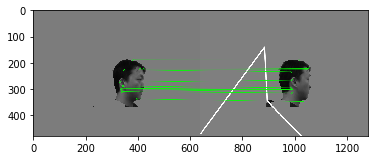

ids are not unique
start icp
step:  0 before:  0.009188422126372836
found the best fit transform 0
6
join 5, 6
ids are not unique
Searching (head 5 and 6), 0/84 done, distance: 0.01136385891657176
ids are not unique
Searching (head 5 and 6), 1/84 done, distance: 0.011115207564233356
ids are not unique
Searching (head 5 and 6), 2/84 done, distance: 0.013541811943089788
ids are not unique
Searching (head 5 and 6), 3/84 done, distance: 0.011499245242982934
ids are not unique
Searching (head 5 and 6), 4/84 done, distance: 0.012917774317737959
ids are not unique
Searching (head 5 and 6), 5/84 done, distance: 0.013165346470786092
ids are not unique
Searching (head 5 and 6), 6/84 done, distance: 0.009201196028680601
ids are not unique
Searching (head 5 and 6), 7/84 done, distance: 0.009566465104120606
ids are not unique
Searching (head 5 and 6), 8/84 done, distance: 0.010448551068676058
ids are not unique
Searching (head 5 and 6), 9/84 done, distance: 0.014172915399316382
ids are not unique
S

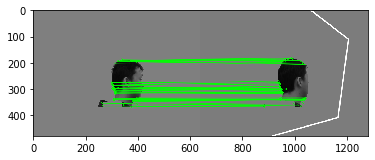

ids are not unique
start icp
step:  0 before:  0.010038513472686094
found the best fit transform 0
7
join 6, 7
Searching (head 6 and 7), 0/84 done, distance: 0.04173738278851391
ids are not unique
Searching (head 6 and 7), 1/84 done, distance: 0.03947989358529976
ids are not unique
Searching (head 6 and 7), 2/84 done, distance: 0.0112447165021439
ids are not unique
Searching (head 6 and 7), 3/84 done, distance: 0.036343549608098207
ids are not unique
Searching (head 6 and 7), 4/84 done, distance: 0.03184229781589089
ids are not unique
Searching (head 6 and 7), 5/84 done, distance: 0.036547010687364524
ids are not unique
Searching (head 6 and 7), 6/84 done, distance: 0.030520468413185196
ids are not unique
Searching (head 6 and 7), 7/84 done, distance: 0.033728161315587764
ids are not unique
Searching (head 6 and 7), 8/84 done, distance: 0.029225280880084668
ids are not unique
Searching (head 6 and 7), 9/84 done, distance: 0.028061101695756933
ids are not unique
Searching (head 6 and 7)

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 6 and 7), 50/84 done, distance: 0.030343782780446756
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
ids are not unique
Searching (head 6 and 7), 60/84 done, distance: 0.02572443559005971
ids are not unique
Searching (head 6 and 7), 61/84 done, distance: 0.024187177049414994
ids are not unique
Searching (head 6 and 7), 62/84 done, distance: 0.02487000358404186
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio

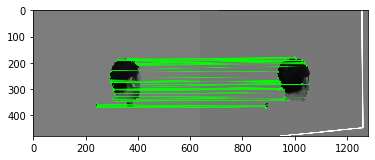

ids are not unique
start icp
step:  0 before:  0.01159862431028453
found the best fit transform 0
8
join 7, 8
ids are not unique
Searching (head 7 and 8), 0/84 done, distance: 0.013505293414889647
ids are not unique
Searching (head 7 and 8), 1/84 done, distance: 0.03379868470547474
ids are not unique
Searching (head 7 and 8), 2/84 done, distance: 0.03348484503380987
ids are not unique
Searching (head 7 and 8), 3/84 done, distance: 0.008335510414602813
ids are not unique
Searching (head 7 and 8), 4/84 done, distance: 0.008586676553120667
ids are not unique
Searching (head 7 and 8), 5/84 done, distance: 0.012077193173674611
ids are not unique
Searching (head 7 and 8), 6/84 done, distance: 0.011155291488733439
ids are not unique
Searching (head 7 and 8), 7/84 done, distance: 0.010699173561122542
ids are not unique
Searching (head 7 and 8), 8/84 done, distance: 0.010449926231963003
ids are not unique
Searching (head 7 and 8), 9/84 done, distance: 0.01150576080737192
ids are not unique
Sear

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 7 and 8), 48/84 done, distance: 0.021383912697754415
Searching (head 7 and 8), 49/84 done, distance: 0.020552980894120283
Searching (head 7 and 8), 50/84 done, distance: 0.021572366068412837
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 7 and 8), 52/84 done, distance: 0.041624557676336035
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 7 and 8), 55/84 done, distance: 0.03319223973582703
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up th

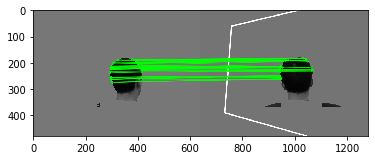

ids are not unique
start icp
step:  0 before:  0.009554206480743115
found the best fit transform 0
9
join 8, 9
ids are not unique
Searching (head 8 and 9), 0/84 done, distance: 0.01088238575428709
ids are not unique
Searching (head 8 and 9), 1/84 done, distance: 0.008545426054438504
ids are not unique
Searching (head 8 and 9), 2/84 done, distance: 0.008606372655554568
ids are not unique
Searching (head 8 and 9), 3/84 done, distance: 0.01038102725374793
ids are not unique
Searching (head 8 and 9), 4/84 done, distance: 0.008363963293811819
ids are not unique
Searching (head 8 and 9), 5/84 done, distance: 0.011190916333685644
ids are not unique
Searching (head 8 and 9), 6/84 done, distance: 0.011800013293097945
ids are not unique
Searching (head 8 and 9), 7/84 done, distance: 0.0100668261787159
ids are not unique
Searching (head 8 and 9), 8/84 done, distance: 0.010115487199367564
ids are not unique
Searching (head 8 and 9), 9/84 done, distance: 0.014858163608259941
ids are not unique
Sear

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 8 and 9), 40/84 done, distance: 0.07101408415879726
ids are not unique
Searching (head 8 and 9), 41/84 done, distance: 0.06989686361542821


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Searching (head 8 and 9), 44/84 done, distance: 0.1658089378151276
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
ids are not unique
Searching (head 8 and 9), 47/84 done, distance: 0.1646179928561157
Searching (head 8 and 9), 48/84 done, distance: 0.032720841599577374


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 1/4, turn up the match ratio.
Searching (head 8 and 9), 60/84 done, distance: 0.03404803815271241


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 1/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 0/4, turn up the match ratio.
Searching (head 8 and 9), 73/84 done, distance: 0.03903999880429153


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 8 and 9), 76/84 done, distance: 0.03952577427917711


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 0/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 1/4, turn up the match ratio.
4 min_dist 0.008363963293811819 params: [ 0.04 20.    0.5 ]


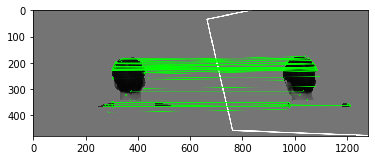

ids are not unique
start icp
step:  0 before:  0.009969784249155398
found the best fit transform 0
10
join 9, 10
ids are not unique
Searching (head 9 and 10), 0/84 done, distance: 0.011368830809051557
ids are not unique
Searching (head 9 and 10), 1/84 done, distance: 0.01119569518892351
ids are not unique
Searching (head 9 and 10), 2/84 done, distance: 0.012913705555618674
ids are not unique
Searching (head 9 and 10), 3/84 done, distance: 0.013549099792804798
ids are not unique
Searching (head 9 and 10), 4/84 done, distance: 0.014837305501348852
ids are not unique
Searching (head 9 and 10), 5/84 done, distance: 0.01291838749910188
ids are not unique
Searching (head 9 and 10), 6/84 done, distance: 0.015383766452074827
ids are not unique
Searching (head 9 and 10), 7/84 done, distance: 0.015864619629725695
ids are not unique
Searching (head 9 and 10), 8/84 done, distance: 0.01515828159284002
ids are not unique
Searching (head 9 and 10), 9/84 done, distance: 0.014793720078656383
ids are no

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
ids are not unique
ids are not unique
ids are not unique
ids are not unique
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 1/4, turn up the match ratio.
Not enough matches are found - 1/4, turn up the match ratio.
Not enough matches are found - 1/4, turn up the match ratio.


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 1/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.


/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Not enough matches are found - 0/4, turn up the match ratio.
Not enough matches are found - 0/4, turn up the match ratio.
Not enough matches are found - 0/4, turn up the match ratio.
Searching (head 9 and 10), 72/84 done, distance: 0.04217710727197455


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
12 min_dist 0.009151840424473305 params: [ 0.02 10.    1.  ]


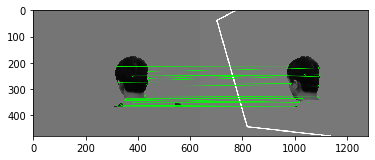

ids are not unique
start icp
step:  0 before:  0.011185982723067684
found the best fit transform 0
11
join 10, 11
ids are not unique
Searching (head 10 and 11), 0/84 done, distance: 0.031237225827850292
ids are not unique
Searching (head 10 and 11), 1/84 done, distance: 0.00889563330551036
ids are not unique
Searching (head 10 and 11), 2/84 done, distance: 0.008357290190875884
ids are not unique
Searching (head 10 and 11), 3/84 done, distance: 0.007705799132619946
ids are not unique
Searching (head 10 and 11), 4/84 done, distance: 0.012191504384031038
ids are not unique
Searching (head 10 and 11), 5/84 done, distance: 0.008058116869293804
ids are not unique
Searching (head 10 and 11), 6/84 done, distance: 0.007843526073325061
ids are not unique
Searching (head 10 and 11), 7/84 done, distance: 0.00796619567766926
ids are not unique
Searching (head 10 and 11), 8/84 done, distance: 0.0077581670745881905
Searching (head 10 and 11), 9/84 done, distance: 0.008120847765955766
Searching (head 

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 10 and 11), 24/84 done, distance: 0.020546992595519533
Searching (head 10 and 11), 25/84 done, distance: 0.011445725832791166
Searching (head 10 and 11), 26/84 done, distance: 0.011124211031665098
Searching (head 10 and 11), 27/84 done, distance: 0.05108206125588044
Searching (head 10 and 11), 28/84 done, distance: 0.0511146093321659
Searching (head 10 and 11), 29/84 done, distance: 0.020412443199296977
Searching (head 10 and 11), 30/84 done, distance: 0.05174645146836385


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 10 and 11), 36/84 done, distance: 0.03645357106779316
Searching (head 10 and 11), 37/84 done, distance: 0.04309977617310106
Searching (head 10 and 11), 38/84 done, distance: 0.04230831340643858
Not enough matches are found - 4/4, turn up the match ratio.


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Searching (head 10 and 11), 48/84 done, distance: 0.03817864903557777
Searching (head 10 and 11), 49/84 done, distance: 0.009184151103177607
Searching (head 10 and 11), 50/84 done, distance: 0.00925880944326731
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 10 and 11), 52/84 done, distance: 0.04259442241290626
Searching (head 10 and 11), 53/84 done, distance: 0.04228510902865215
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Searching (head 10 and 11), 60/84 done,

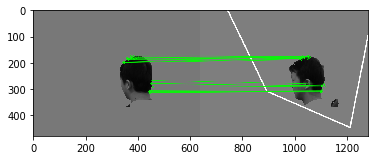

start icp
step:  0 before:  0.007633438470780916
found the best fit transform 0
12
join 11, 12
ids are not unique
Searching (head 11 and 12), 0/84 done, distance: 0.011253350398850418
ids are not unique
Searching (head 11 and 12), 1/84 done, distance: 0.010698816984909189
ids are not unique
Searching (head 11 and 12), 2/84 done, distance: 0.012988996087016542
ids are not unique
Searching (head 11 and 12), 3/84 done, distance: 0.011664834131525133
ids are not unique
Searching (head 11 and 12), 4/84 done, distance: 0.011665980896277798
ids are not unique
Searching (head 11 and 12), 5/84 done, distance: 0.05045675878208388
ids are not unique
Searching (head 11 and 12), 6/84 done, distance: 0.050525264790529725
ids are not unique
Searching (head 11 and 12), 7/84 done, distance: 0.010277030821767468
ids are not unique
Searching (head 11 and 12), 8/84 done, distance: 0.009767033694804191
ids are not unique
Searching (head 11 and 12), 9/84 done, distance: 0.011875799064837985
ids are not uniq

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX


Searching (head 11 and 12), 33/84 done, distance: 0.020443290341232552
Searching (head 11 and 12), 34/84 done, distance: 0.018913616423145853
Searching (head 11 and 12), 35/84 done, distance: 0.019103709456479122
ids are not unique
Searching (head 11 and 12), 36/84 done, distance: 0.014434254739560353
ids are not unique
Searching (head 11 and 12), 37/84 done, distance: 0.01146170792386299
ids are not unique
Searching (head 11 and 12), 38/84 done, distance: 0.010706345352866334
ids are not unique
Searching (head 11 and 12), 39/84 done, distance: 0.04221792125117334
ids are not unique


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Searching (head 11 and 12), 41/84 done, distance: 0.04277508313793585
Searching (head 11 and 12), 42/84 done, distance: 0.05236028716600354
Searching (head 11 and 12), 43/84 done, distance: 0.029283880045219743
Searching (head 11 and 12), 44/84 done, distance: 0.028177493800271774
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 11 and 12), 48/84 done, distance: 0.015003422992724126
Searching (head 11 and 12), 49/84 done, distance: 0.015720394204803204
Searching (head 11 and 12), 50/84 done, distance: 0.015533023451927802
Searching (head 11 and 12), 51/84 done, distance: 0.029426948556869077
ids are not unique
Searching (head 11 and 12), 52/84 done, distance: 0.034495917759983424
ids are not unique
Searching (head 11 and 12), 53/84 done, distance: 0.034741499616737226
Not enough matches are found - 4/4, turn up the matc

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Searching (head 11 and 12), 60/84 done, distance: 0.01604694046932855
Searching (head 11 and 12), 61/84 done, distance: 0.014240897633932301
Searching (head 11 and 12), 62/84 done, distance: 0.01382593221781781
ids are not unique
Searching (head 11 and 12), 63/84 done, distance: 0.030100765133238103
ids are not unique


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Not enough matches are found - 4/4, turn up the match ratio.
ids are not unique
ids are not unique
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
ids are not unique
Searching (head 11 and 12), 72/84 done, distance: 0.04022742886050272
ids are not unique
Searching (head 11 and 12), 73/84 done, distance: 0.04099679010764319
ids are not unique
Searching (head 11 and 12), 74/84 done, distance: 0.039540307483960285
ids are not unique
Searching (head 11 and 12), 75/84 done, distance: 0.05421865335805849
ids are not unique
Searching (head 11 and 12), 76/84 done, distance: 0.015347344145885235
ids are not unique
Searching (head 11 and 12), 77/84 done, distance: 0.013532462844930778
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn

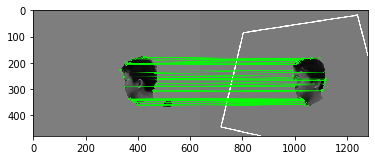

ids are not unique
start icp
step:  0 before:  0.011454143676819772
found the best fit transform 0
13
join 12, 13
ids are not unique
Searching (head 12 and 13), 0/84 done, distance: 0.007426130188631128
ids are not unique
Searching (head 12 and 13), 1/84 done, distance: 0.007183634908713168
ids are not unique
Searching (head 12 and 13), 2/84 done, distance: 0.008033052753346781
ids are not unique
Searching (head 12 and 13), 3/84 done, distance: 0.012966347962443699
ids are not unique
Searching (head 12 and 13), 4/84 done, distance: 0.010452076461863413
ids are not unique
Searching (head 12 and 13), 5/84 done, distance: 0.008950511502681701
ids are not unique
Searching (head 12 and 13), 6/84 done, distance: 0.03994838968942557
ids are not unique
Searching (head 12 and 13), 7/84 done, distance: 0.01793793344651486
ids are not unique
Searching (head 12 and 13), 8/84 done, distance: 0.041374652303956566
ids are not unique
Searching (head 12 and 13), 9/84 done, distance: 0.01793269359329086

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 12 and 13), 78/84 done, distance: 0.03953906282947907
Searching (head 12 and 13), 79/84 done, distance: 0.028863941924937873
Searching (head 12 and 13), 80/84 done, distance: 0.028941735021472213
15 min_dist 0.0067756106531445095 params: [ 0.04 10.    1.  ]


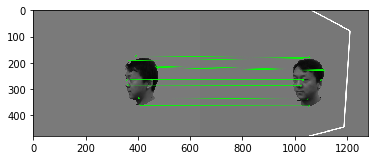

start icp
step:  0 before:  0.007944237994207447
found the best fit transform 0
14
join 13, 14
ids are not unique
Searching (head 13 and 14), 0/84 done, distance: 0.011820051570370284
ids are not unique
Searching (head 13 and 14), 1/84 done, distance: 0.011230968238279617
ids are not unique
Searching (head 13 and 14), 2/84 done, distance: 0.010470028619028831
ids are not unique
Searching (head 13 and 14), 3/84 done, distance: 0.01224833430363618
ids are not unique
Searching (head 13 and 14), 4/84 done, distance: 0.011858092229937297
Searching (head 13 and 14), 5/84 done, distance: 0.011300088632332318
ids are not unique
Searching (head 13 and 14), 6/84 done, distance: 0.012233670196255972
ids are not unique
Searching (head 13 and 14), 7/84 done, distance: 0.012512221154736946
ids are not unique
Searching (head 13 and 14), 8/84 done, distance: 0.012431353960529747
Searching (head 13 and 14), 9/84 done, distance: 0.054225939738026266
Searching (head 13 and 14), 10/84 done, distance: 0.01

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Searching (head 13 and 14), 19/84 done, distance: 0.02183907026303249
ids are not unique
Searching (head 13 and 14), 20/84 done, distance: 0.023082675087528596
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 13 and 14), 24/84 done, distance: 0.011367363909434684
Searching (head 13 and 14), 25/84 done, distance: 0.011271302477326165
Searching (head 13 and 14), 26/84 done, distance: 0.011617050299729077
Searching (head 13 and 14), 27/84 done, distance: 0.011325569396301515
Searching (head 13 and 14), 28/84 done, distance: 0.012157642320811856
ids are not unique
Searching (head 13 and 14), 29/84 done, distance: 0.011836265902324209
Searching (head 13 and 14), 30/84 done, distance: 0.010516546923764837
Searching (head 13 and 14), 31/84 done, distance: 0.0369485799192682
Searching (head 13 and 14), 32/84 done, distance: 0.03689481096590432
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up 

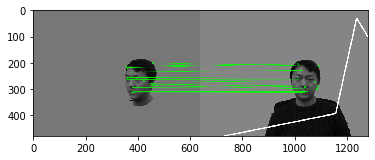

start icp
step:  0 before:  0.010910321804974027
found the best fit transform 0
completed


In [7]:
make_mhead(all_heads,0,14)

ids are not unique
Searching (head 0 and 1), 0/84 done, distance: 0.040086781246902126
ids are not unique
Searching (head 0 and 1), 1/84 done, distance: 0.04063720413673327
ids are not unique
Searching (head 0 and 1), 2/84 done, distance: 0.0411468955672229
ids are not unique
Searching (head 0 and 1), 3/84 done, distance: 0.04332068385487619
ids are not unique
Searching (head 0 and 1), 4/84 done, distance: 0.0420281861203029
ids are not unique
Searching (head 0 and 1), 5/84 done, distance: 0.05762806652502042
ids are not unique
Searching (head 0 and 1), 6/84 done, distance: 0.04958453106605051
ids are not unique
Searching (head 0 and 1), 7/84 done, distance: 0.03997902571920495
ids are not unique
Searching (head 0 and 1), 8/84 done, distance: 0.038875817052535455
Searching (head 0 and 1), 9/84 done, distance: 0.03896876416113257
Searching (head 0 and 1), 10/84 done, distance: 0.03835279657772508
Searching (head 0 and 1), 11/84 done, distance: 0.03915979556994416
ids are not unique
Sear

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 0 and 1), 36/84 done, distance: 0.06458231747247148
Searching (head 0 and 1), 37/84 done, distance: 0.07000870496191018
Searching (head 0 and 1), 38/84 done, distance: 0.07146267109132677
Searching (head 0 and 1), 39/84 done, distance: 0.06615724148080497
Searching (head 0 and 1), 40/84 done, distance: 0.066412303598474
Searching (head 0 and 1), 41/84 done, distance: 0.06621541914444985


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 0 and 1), 46/84 done, distance: 0.047954084426976094
Searching (head 0 and 1), 47/84 done, distance: 0.04829798955544758
Searching (head 0 and 1), 48/84 done, distance: 0.08067190062862169
Searching (head 0 and 1), 49/84 done, distance: 0.08300838927122373
Searching (head 0 and 1), 50/84 done, distance: 0.08530996703347137


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 0 and 1), 52/84 done, distance: 0.08437694616806216
Searching (head 0 and 1), 53/84 done, distance: 0.08318642339382876
Searching (head 0 and 1), 54/84 done, distance: 0.051054595827852725


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Searching (head 0 and 1), 60/84 done, distance: 0.07544189693065363
ids are not unique
Searching (head 0 and 1), 61/84 done, distance: 0.04019888567968035
ids are not unique
Searching (head 0 and 1), 62/84 done, distance: 0.03769403989776642
ids are not unique
Searching (head 0 and 1), 63/84 done, distance: 0.04007746342113696
ids are not unique
Searching (head 0 and 1), 64/84 done, distance: 0.041228412423448796
ids are not unique
Searching (head 0 and 1), 65/84 done, distance: 0.03931211903571837
ids are not unique
Searching (head 0 and 1), 66/84 done, distance: 0.0730641890722233
ids are not unique
Searching (head 0 and 1), 67/84 done, distance: 0.07412176454853646
ids are not unique
Searching (head 0 and 1), 68/84 done, distance: 0.0727782112159897
ids are not unique
Searching (head 0 and 1), 69/84 done, distance: 0.0413679822554364
ids are not unique
Searching (head 0 and 1), 70/84 done, distance: 0.040529271714695905
ids are not unique
Searching (head 0 and 1),

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


62 min_dist 0.03769403989776642 params: [2.e-02 3.e+01 5.e+00]


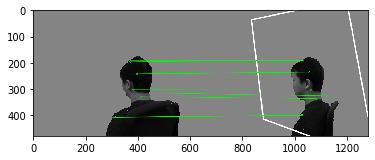

ids are not unique
start icp
step:  0 before:  0.04132225274467732
found the best fit transform 0
completed


In [17]:
make_mhead(all_heads,10,11)